In [82]:
# libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error

In [83]:
# import data
df = pd.read_csv('./data.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


In [84]:
target = df[['MEDV']]
data = df.drop('MEDV',
               axis=1,
               inplace=False)

In [85]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [86]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [87]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
506,0.98765,0.0,12.5,0,0.561,6.980,89.0,2.098,3,320,23.0,396.0,12.0
507,0.23456,0.0,12.5,0,0.561,6.980,76.0,2.654,3,320,23.0,343.0,25.0
508,0.44433,0.0,12.5,0,0.561,6.123,98.0,2.987,3,320,23.0,343.0,21.0
509,0.77763,0.0,12.7,0,0.561,6.222,34.0,2.543,3,329,23.0,343.0,76.0
510,0.65432,0.0,12.8,0,0.561,6.760,67.0,2.987,3,345,23.0,321.0,45.0


In [88]:
# data cleaning
# data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 52.0 KB


In [89]:
# nullity check
masked = np.isnan(data)
masked.apply(lambda x: x.sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [90]:
# imputation missing values
# vary few missing values, so impute feature avg. to nans
RM_avg = np.mean(data['RM'])
data.fillna(RM_avg,
            inplace=True)

In [91]:
data.apply(lambda x: x.isna().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [92]:
# exploratory analysis
# summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,511.0,3.584139,8.564433,0.00632,0.082325,0.26169,3.621175,88.9762
ZN,511.0,11.252446,23.234838,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,511.0,11.151096,6.828175,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,511.0,0.068493,0.252838,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,511.0,0.554757,0.115310,0.38500,0.449000,0.53800,0.624000,0.8710
RM,511.0,6.287589,0.700343,3.56100,5.887500,6.21100,6.627000,8.7800
AGE,511.0,68.616243,28.099130,2.90000,45.050000,77.30000,94.050000,100.0000
DIS,511.0,3.783876,2.098631,1.12960,2.100350,3.15230,5.118000,12.1265
RAD,511.0,9.485323,8.688469,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,511.0,407.440313,167.903532,187.00000,279.500000,330.00000,666.000000,711.0000


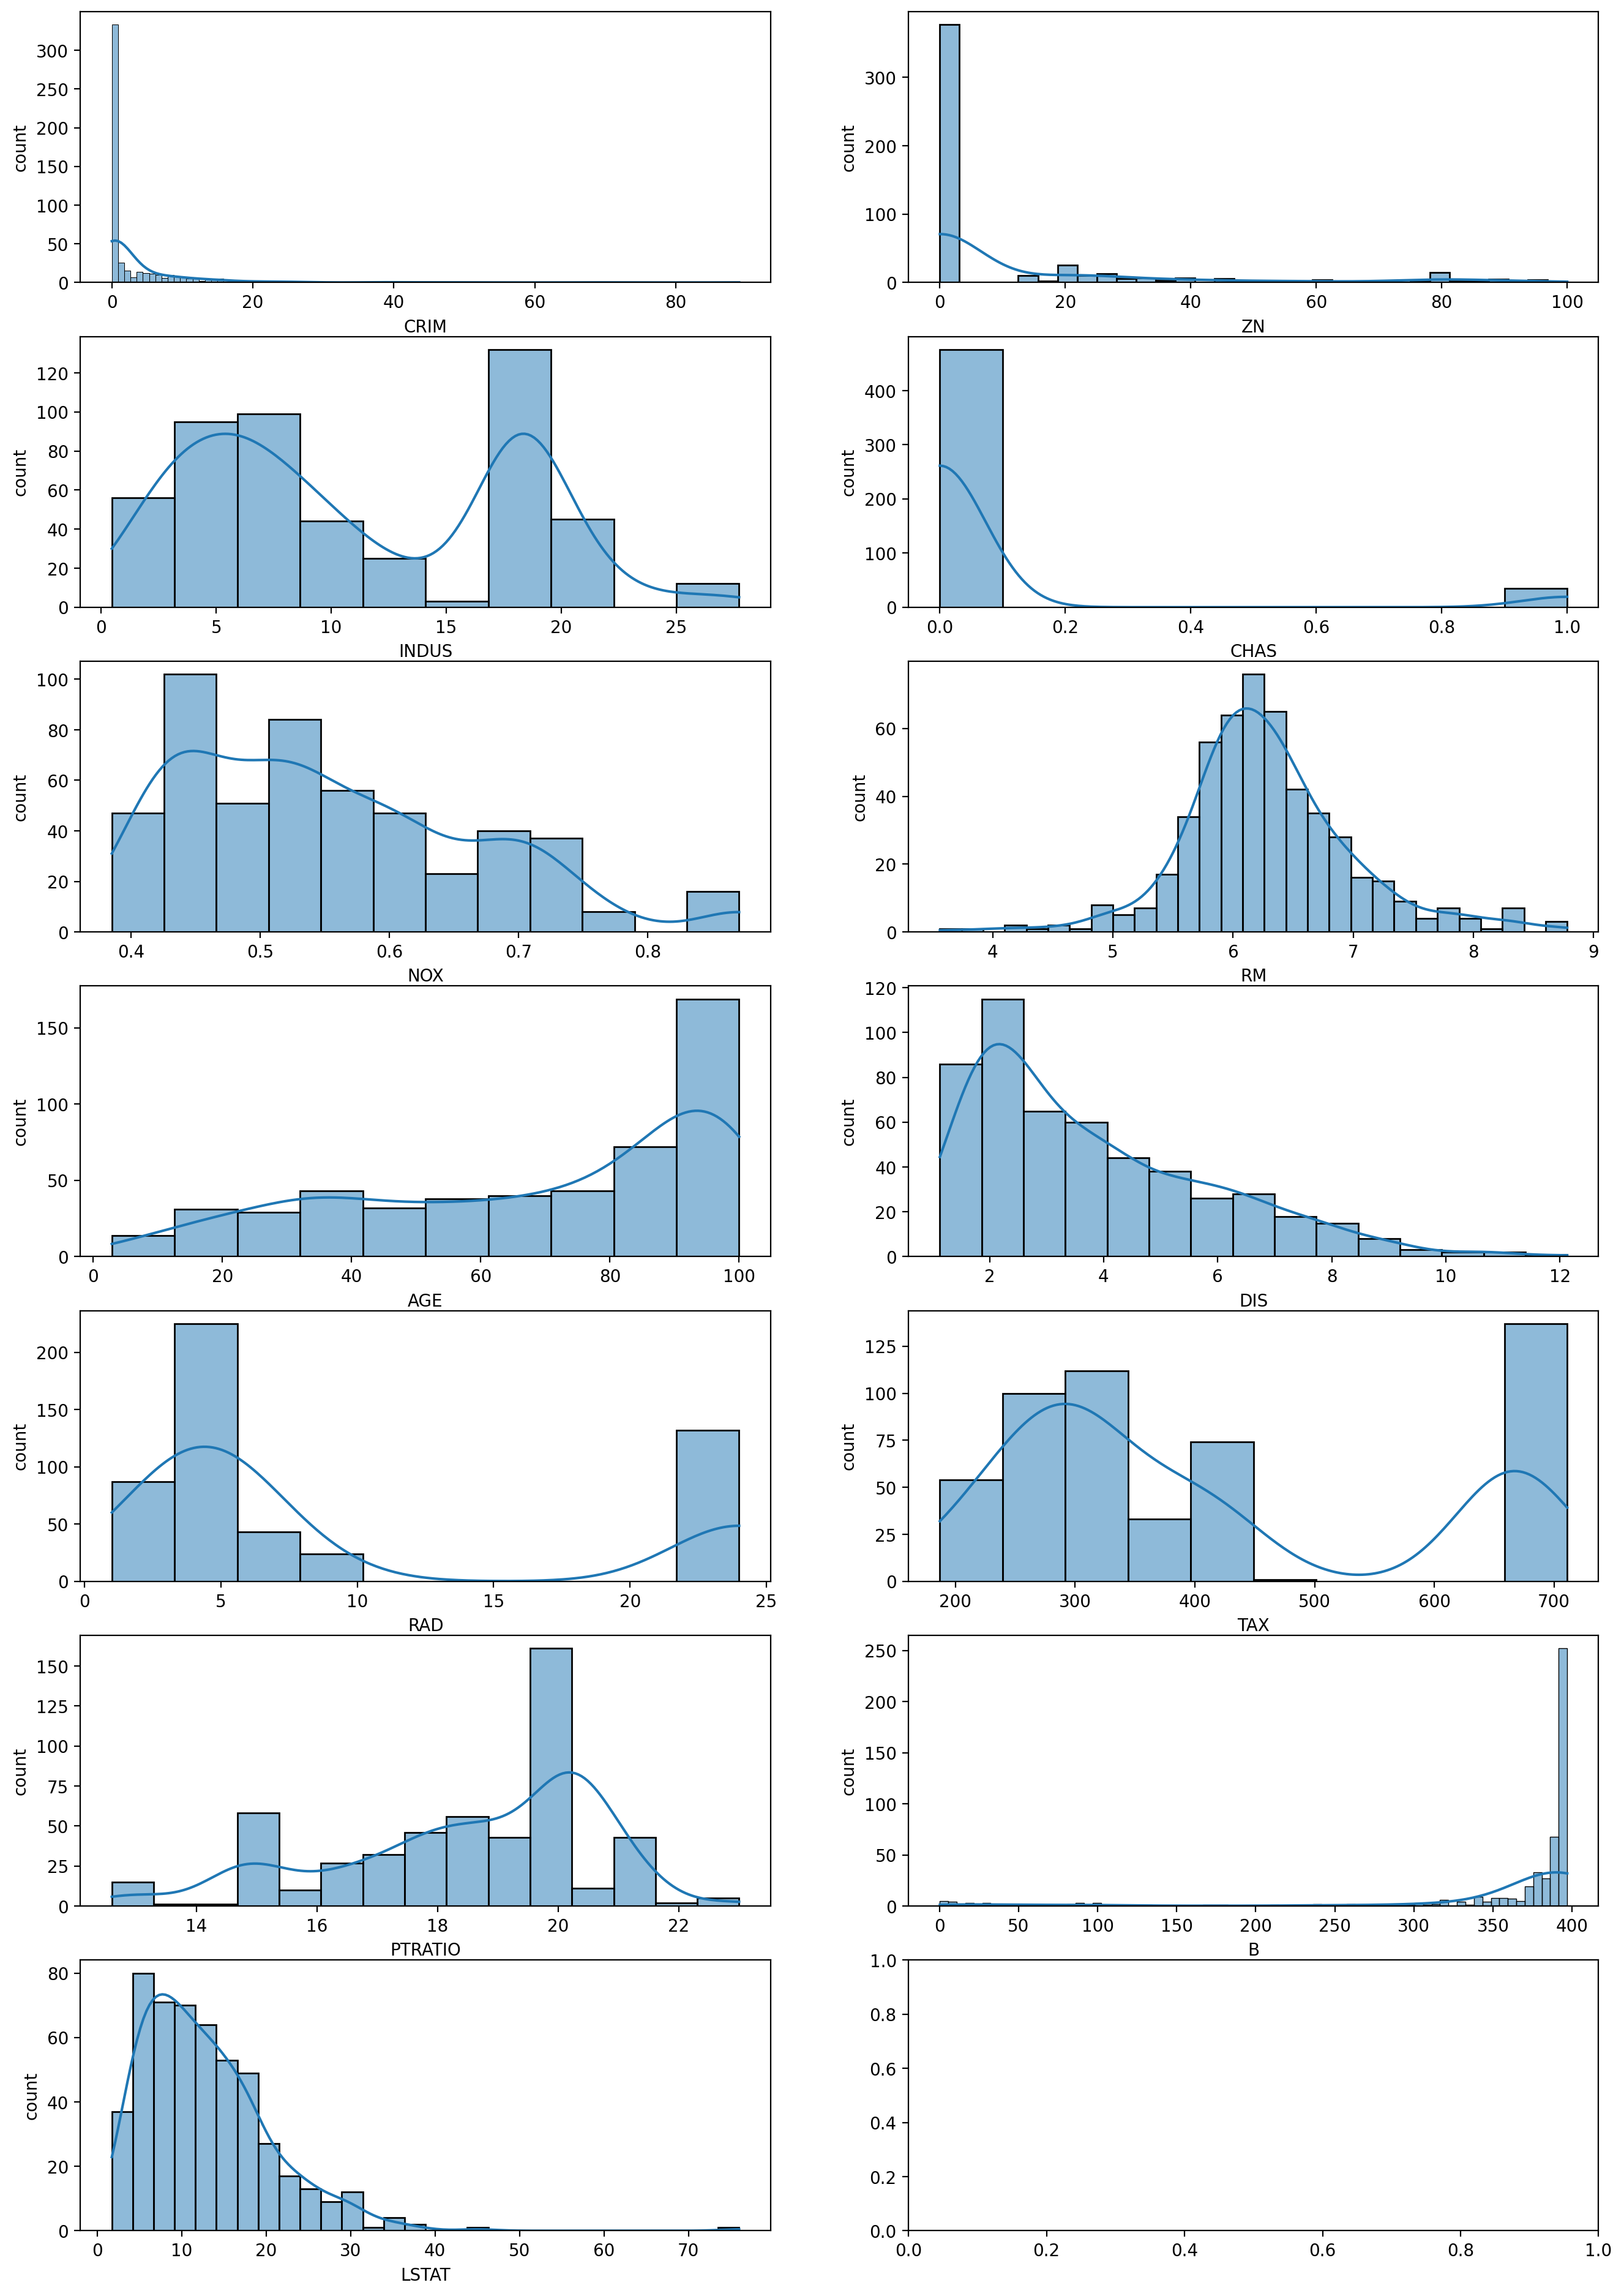

In [93]:
features = np.asarray(data.columns.values)
fig,axes = plt.subplots(nrows=7,
                        ncols=2,
                        figsize=[16,24],
                        dpi=200)

for feature,subplot in zip(features,axes.flatten()):
    sns.histplot(data=data[feature],
                 kde=True,
                 ax=subplot)
    subplot.set_xlabel(feature)
    subplot.set_ylabel('count')

plt.show()

In [94]:
target.describe().T

,count,mean,std,min,25%,50%,75%,max
MEDV,511.0,22.682192,9.484262,5.0,17.05,21.2,25.0,67.0


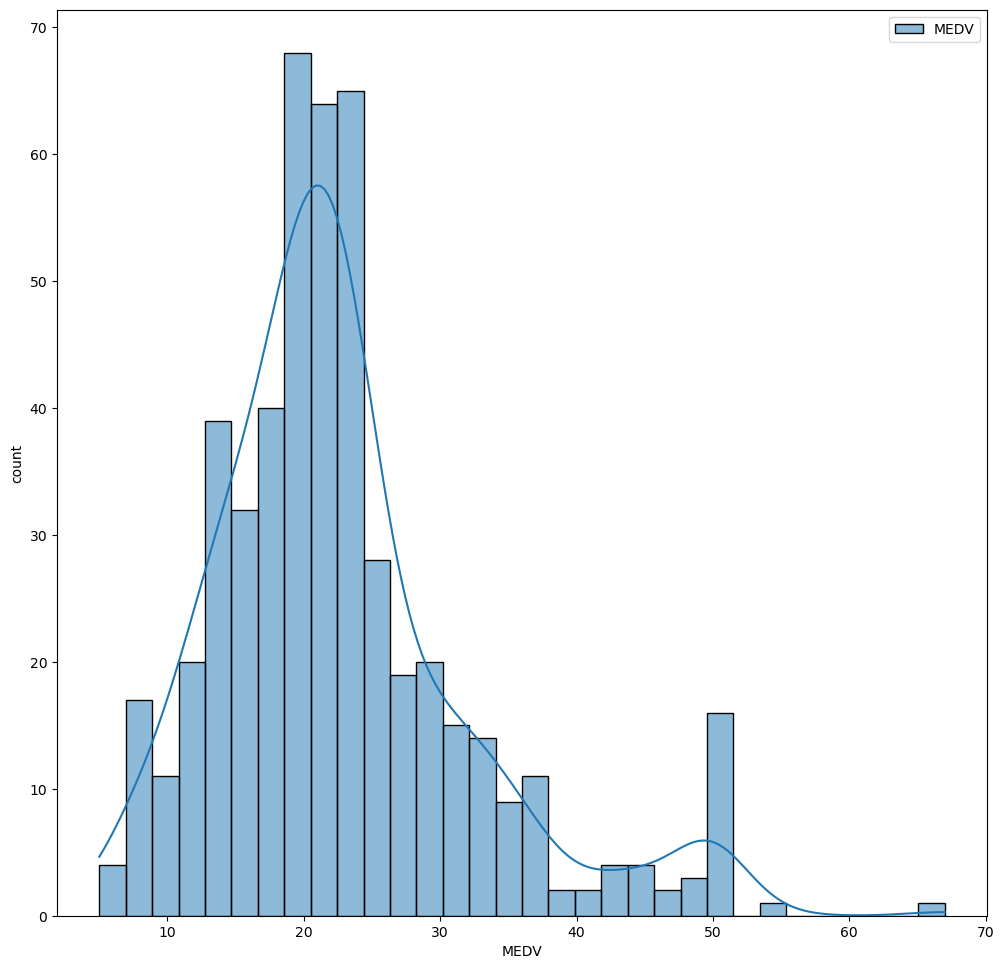

In [95]:
plt.figure(figsize=[12,12],
           dpi=100)
sns.histplot(data=target,
             kde=True)
plt.xlabel('MEDV')
plt.ylabel('count')
plt.show()

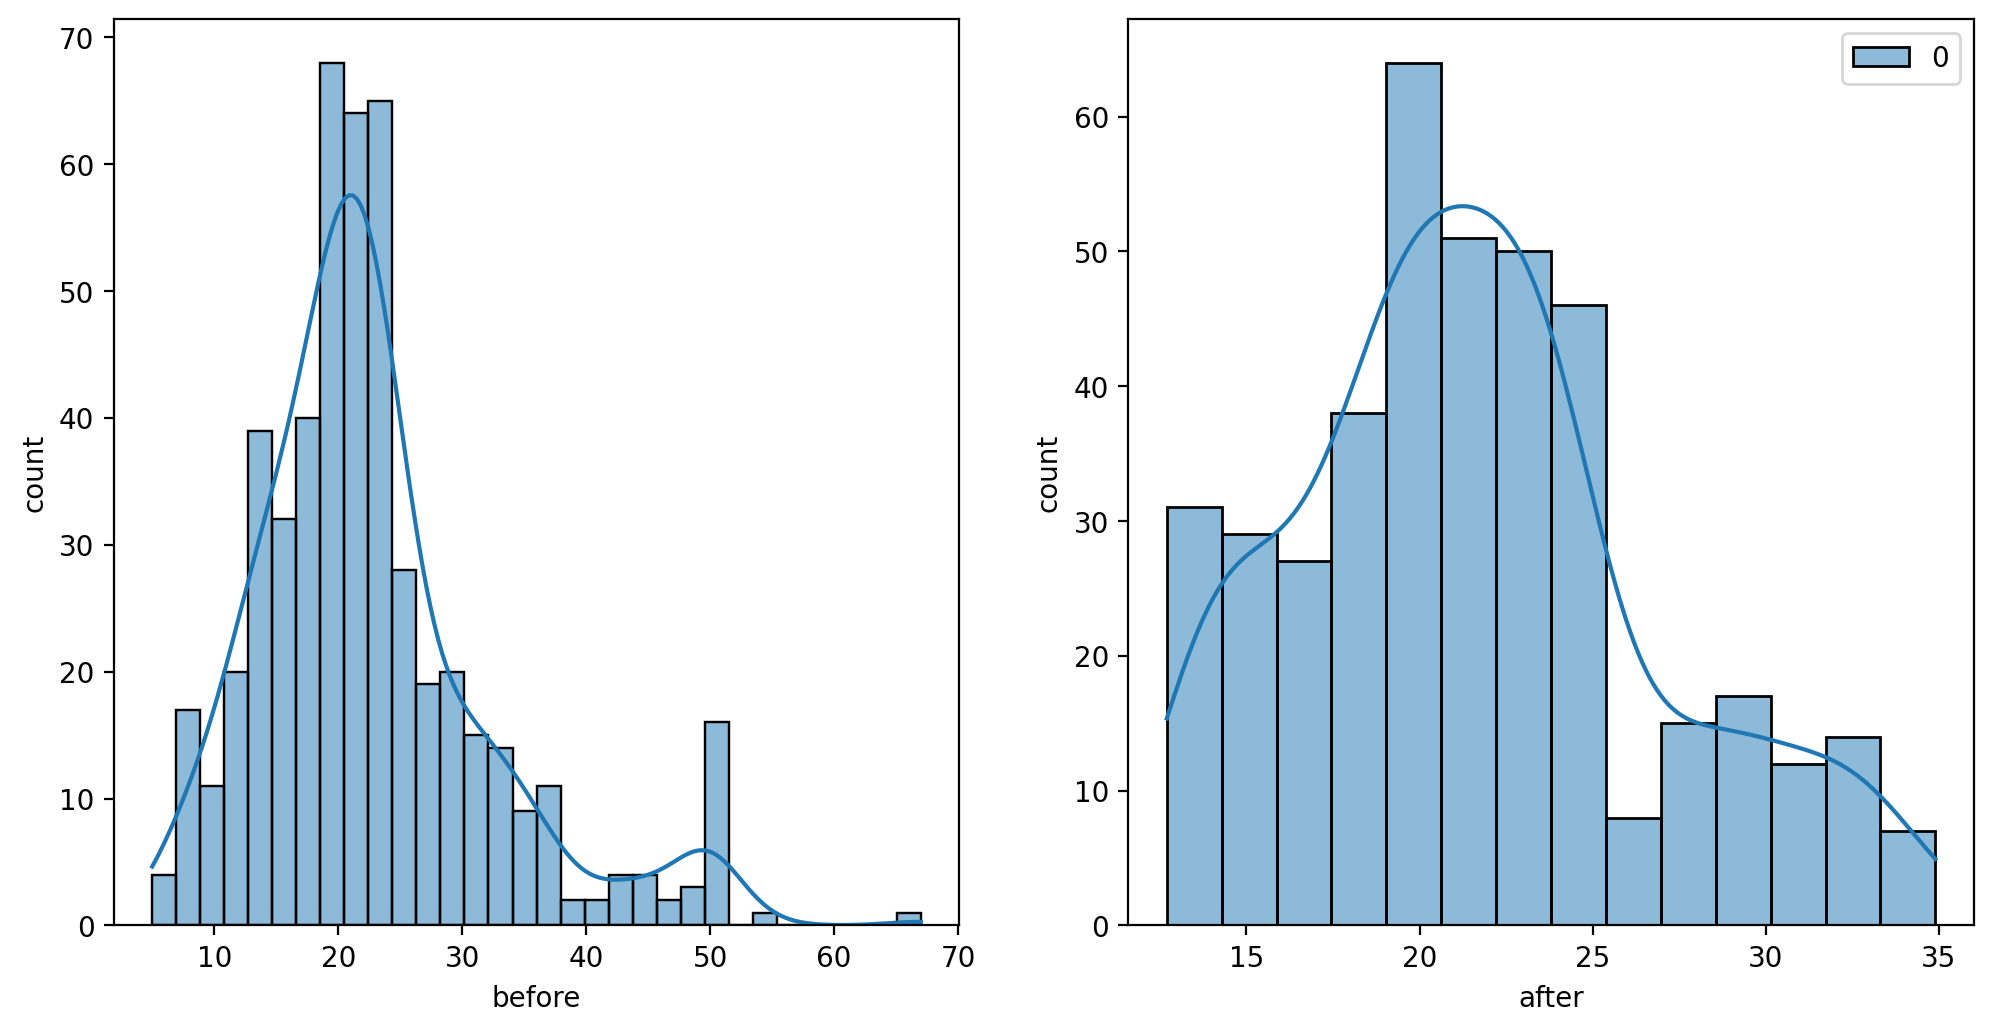

In [96]:
# normalize data
norm_target = stats.trimboth(a=target,
                             proportiontocut=0.1)

fig,(ax1,ax2) = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=[12,6],
                        dpi=200)
axes = [ax1,ax2]
comp = [target.MEDV.values,norm_target]
labels = ['before', 'after']
for i in range(len(axes)):
    sns.histplot(data=comp[i],
                 kde=True,
                 ax=axes[i])
    axes[i].set_xlabel(labels[i])
    axes[i].set_ylabel('count')

plt.show()

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


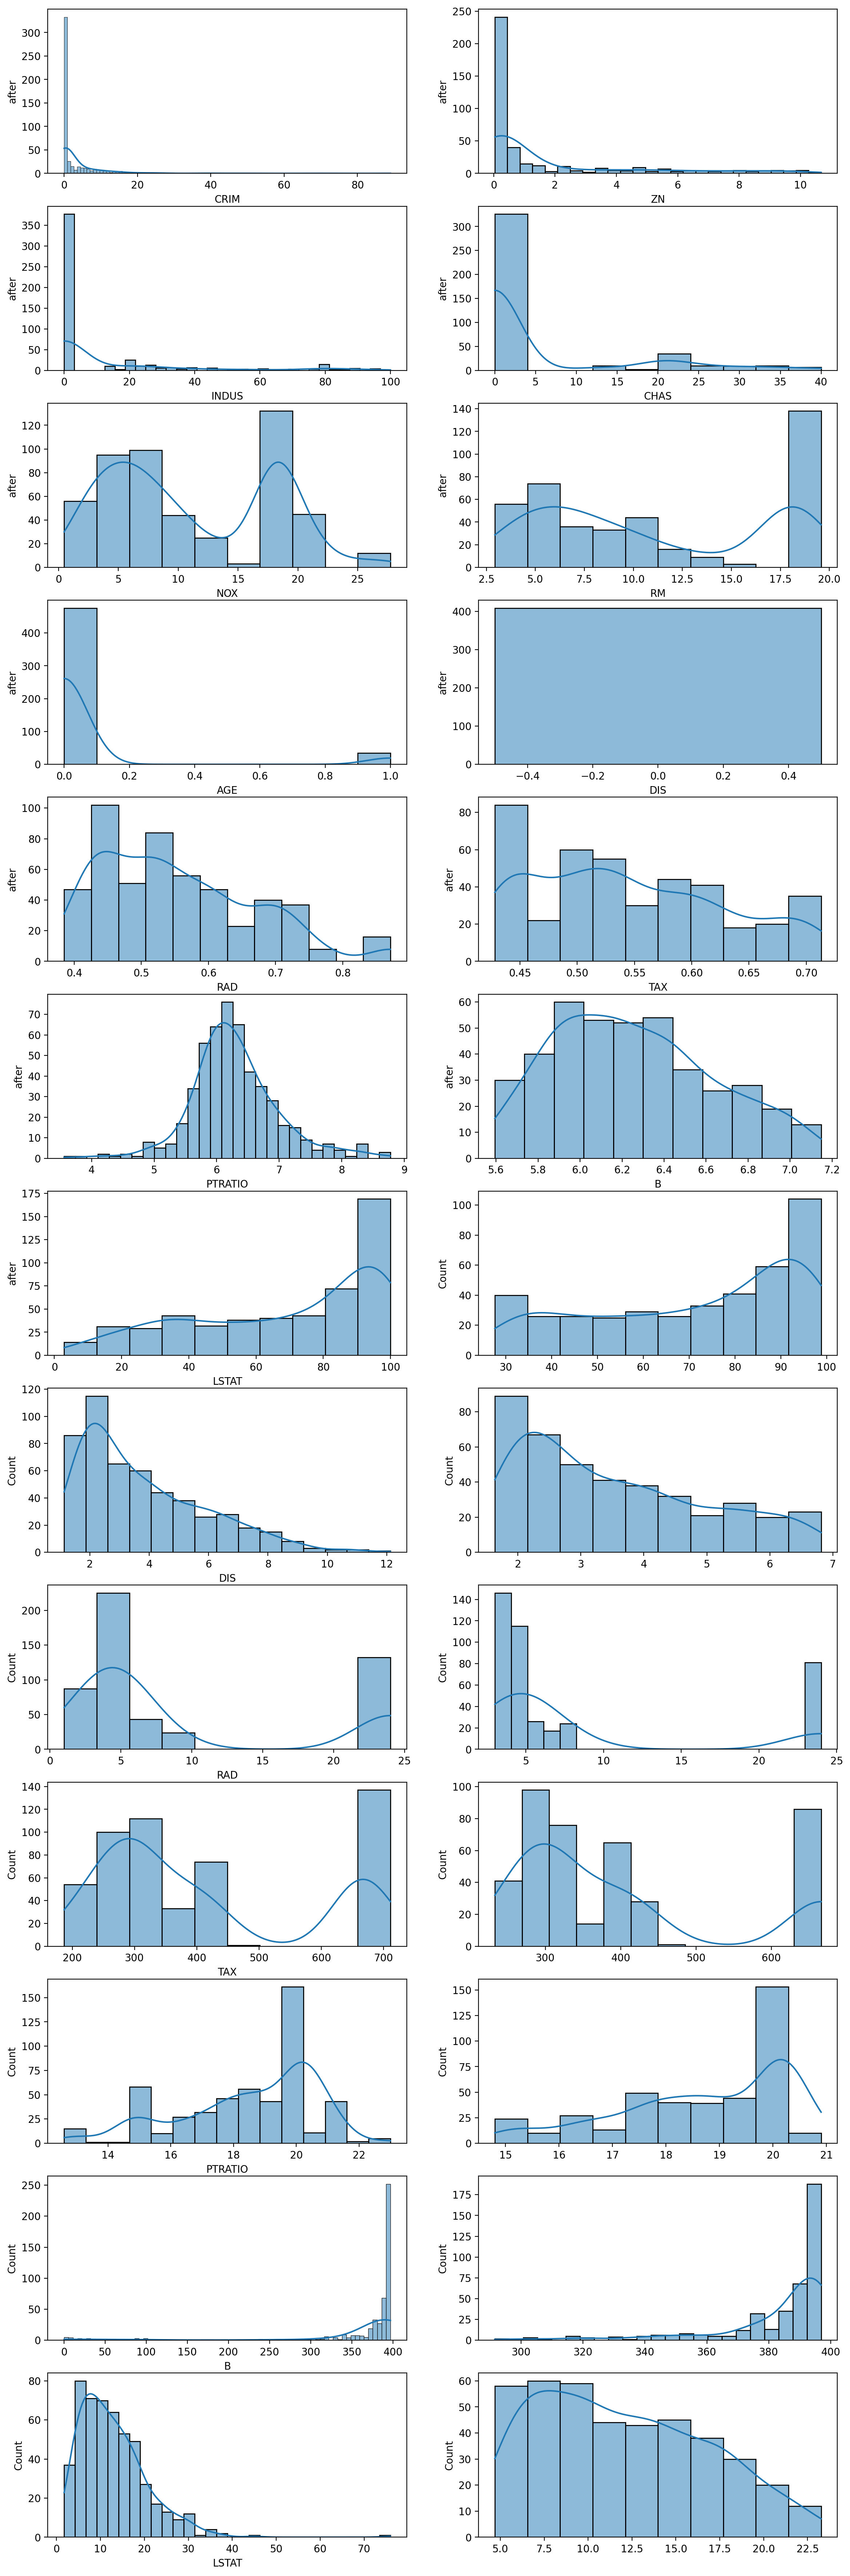

In [97]:
norm_data = stats.trimboth(a=data,
                           proportiontocut=0.1)
cols = np.asarray(data.columns.values)
fig,axes = plt.subplots(nrows=13,
                        ncols=2,
                        figsize=[14,46],
                        dpi=200)
axs = axes.ravel()

for i in range(0,len(cols)):
    sns.histplot(data=data[cols[i]],
                 kde=True,
                 ax=axs[i*2])
    axs[i].set_xlabel(cols[i])
    axs[i].set_ylabel('before')
for i in range(0,len(cols)):
    sns.histplot(data=norm_data[:,i],
                 kde=True,
                 ax=axs[i*2+1])
    axs[i].set_ylabel('after')

plt.show()

In [98]:
# distribution
norm_data = pd.DataFrame(data=norm_data,
                         columns=cols)
norm_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.03871,0.0,2.93,0.0,0.428,5.594,27.6,1.6334,3.0,233.0,14.8,291.55,4.69
1,0.03932,0.0,2.93,0.0,0.428,5.597,27.7,1.6390,3.0,233.0,14.8,292.29,4.70
2,0.03961,0.0,2.95,0.0,0.428,5.599,27.9,1.6475,3.0,233.0,14.8,297.09,4.74
3,0.04011,0.0,2.95,0.0,0.428,5.602,27.7,1.7573,3.0,243.0,15.2,306.38,4.73
4,0.04113,0.0,3.33,0.0,0.428,5.604,28.1,1.7364,3.0,243.0,15.2,304.21,4.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,9.92485,40.0,18.10,0.0,0.713,7.147,98.5,6.4980,24.0,666.0,20.9,396.90,22.88
405,9.96654,35.0,19.58,0.0,0.713,7.135,98.4,6.6115,24.0,666.0,20.9,396.90,22.98
406,10.06230,40.0,19.58,0.0,0.713,7.088,98.3,6.6115,24.0,666.0,20.9,396.90,23.09
407,10.23300,40.0,19.58,0.0,0.713,7.104,98.7,6.2669,24.0,666.0,20.9,396.90,23.24


In [99]:
norm_data.skew()

CRIM       1.834844
ZN         1.906381
INDUS      0.228155
CHAS       0.000000
NOX        0.379239
RM         0.374691
AGE       -0.500266
DIS        0.621650
RAD        1.439001
TAX        1.014904
PTRATIO   -0.720828
B         -2.275745
LSTAT      0.377548
dtype: float64

In [100]:
data.skew()

CRIM       5.249162
ZN         2.242046
INDUS      0.290051
CHAS       3.426722
NOX        0.731239
RM         0.394914
AGE       -0.601268
DIS        1.026020
RAD        1.019393
TAX        0.684024
PTRATIO   -0.730858
B         -2.898598
LSTAT      1.808184
dtype: float64

In [101]:
target.skew()

MEDV    1.227121
dtype: float64

In [102]:
norm_target = pd.DataFrame(data=norm_target,
                           columns=target.columns)
norm_target

,MEDV
0,12.7
1,13.1
2,13.3
3,13.1
4,13.2
...,...
404,33.8
405,34.6
406,34.7
407,34.9


In [103]:
norm_target.skew()

MEDV    0.488339
dtype: float64

In [104]:
data.kurt(),norm_data.kurt()

(CRIM       37.498617
 ZN          4.111316
 INDUS      -1.219981
 CHAS        9.780688
 NOX        -0.037350
 RM          1.903320
 AGE        -0.962417
 DIS         0.523610
 RAD        -0.836724
 TAX        -1.119105
 PTRATIO    -0.244432
 B           7.301352
 LSTAT       8.456060
 dtype: float64,
 CRIM       2.183701
 ZN         2.333017
 INDUS     -1.578481
 CHAS       0.000000
 NOX       -0.932146
 RM        -0.662607
 AGE       -1.150143
 DIS       -0.797373
 RAD        0.192919
 TAX       -0.508213
 PTRATIO   -0.483987
 B          5.159049
 LSTAT     -0.859012
 dtype: float64)

In [105]:
target.kurt(),norm_target.kurt()

(MEDV    2.05821
 dtype: float64,
 MEDV   -0.187431
 dtype: float64)

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 4800x4800 with 0 Axes>

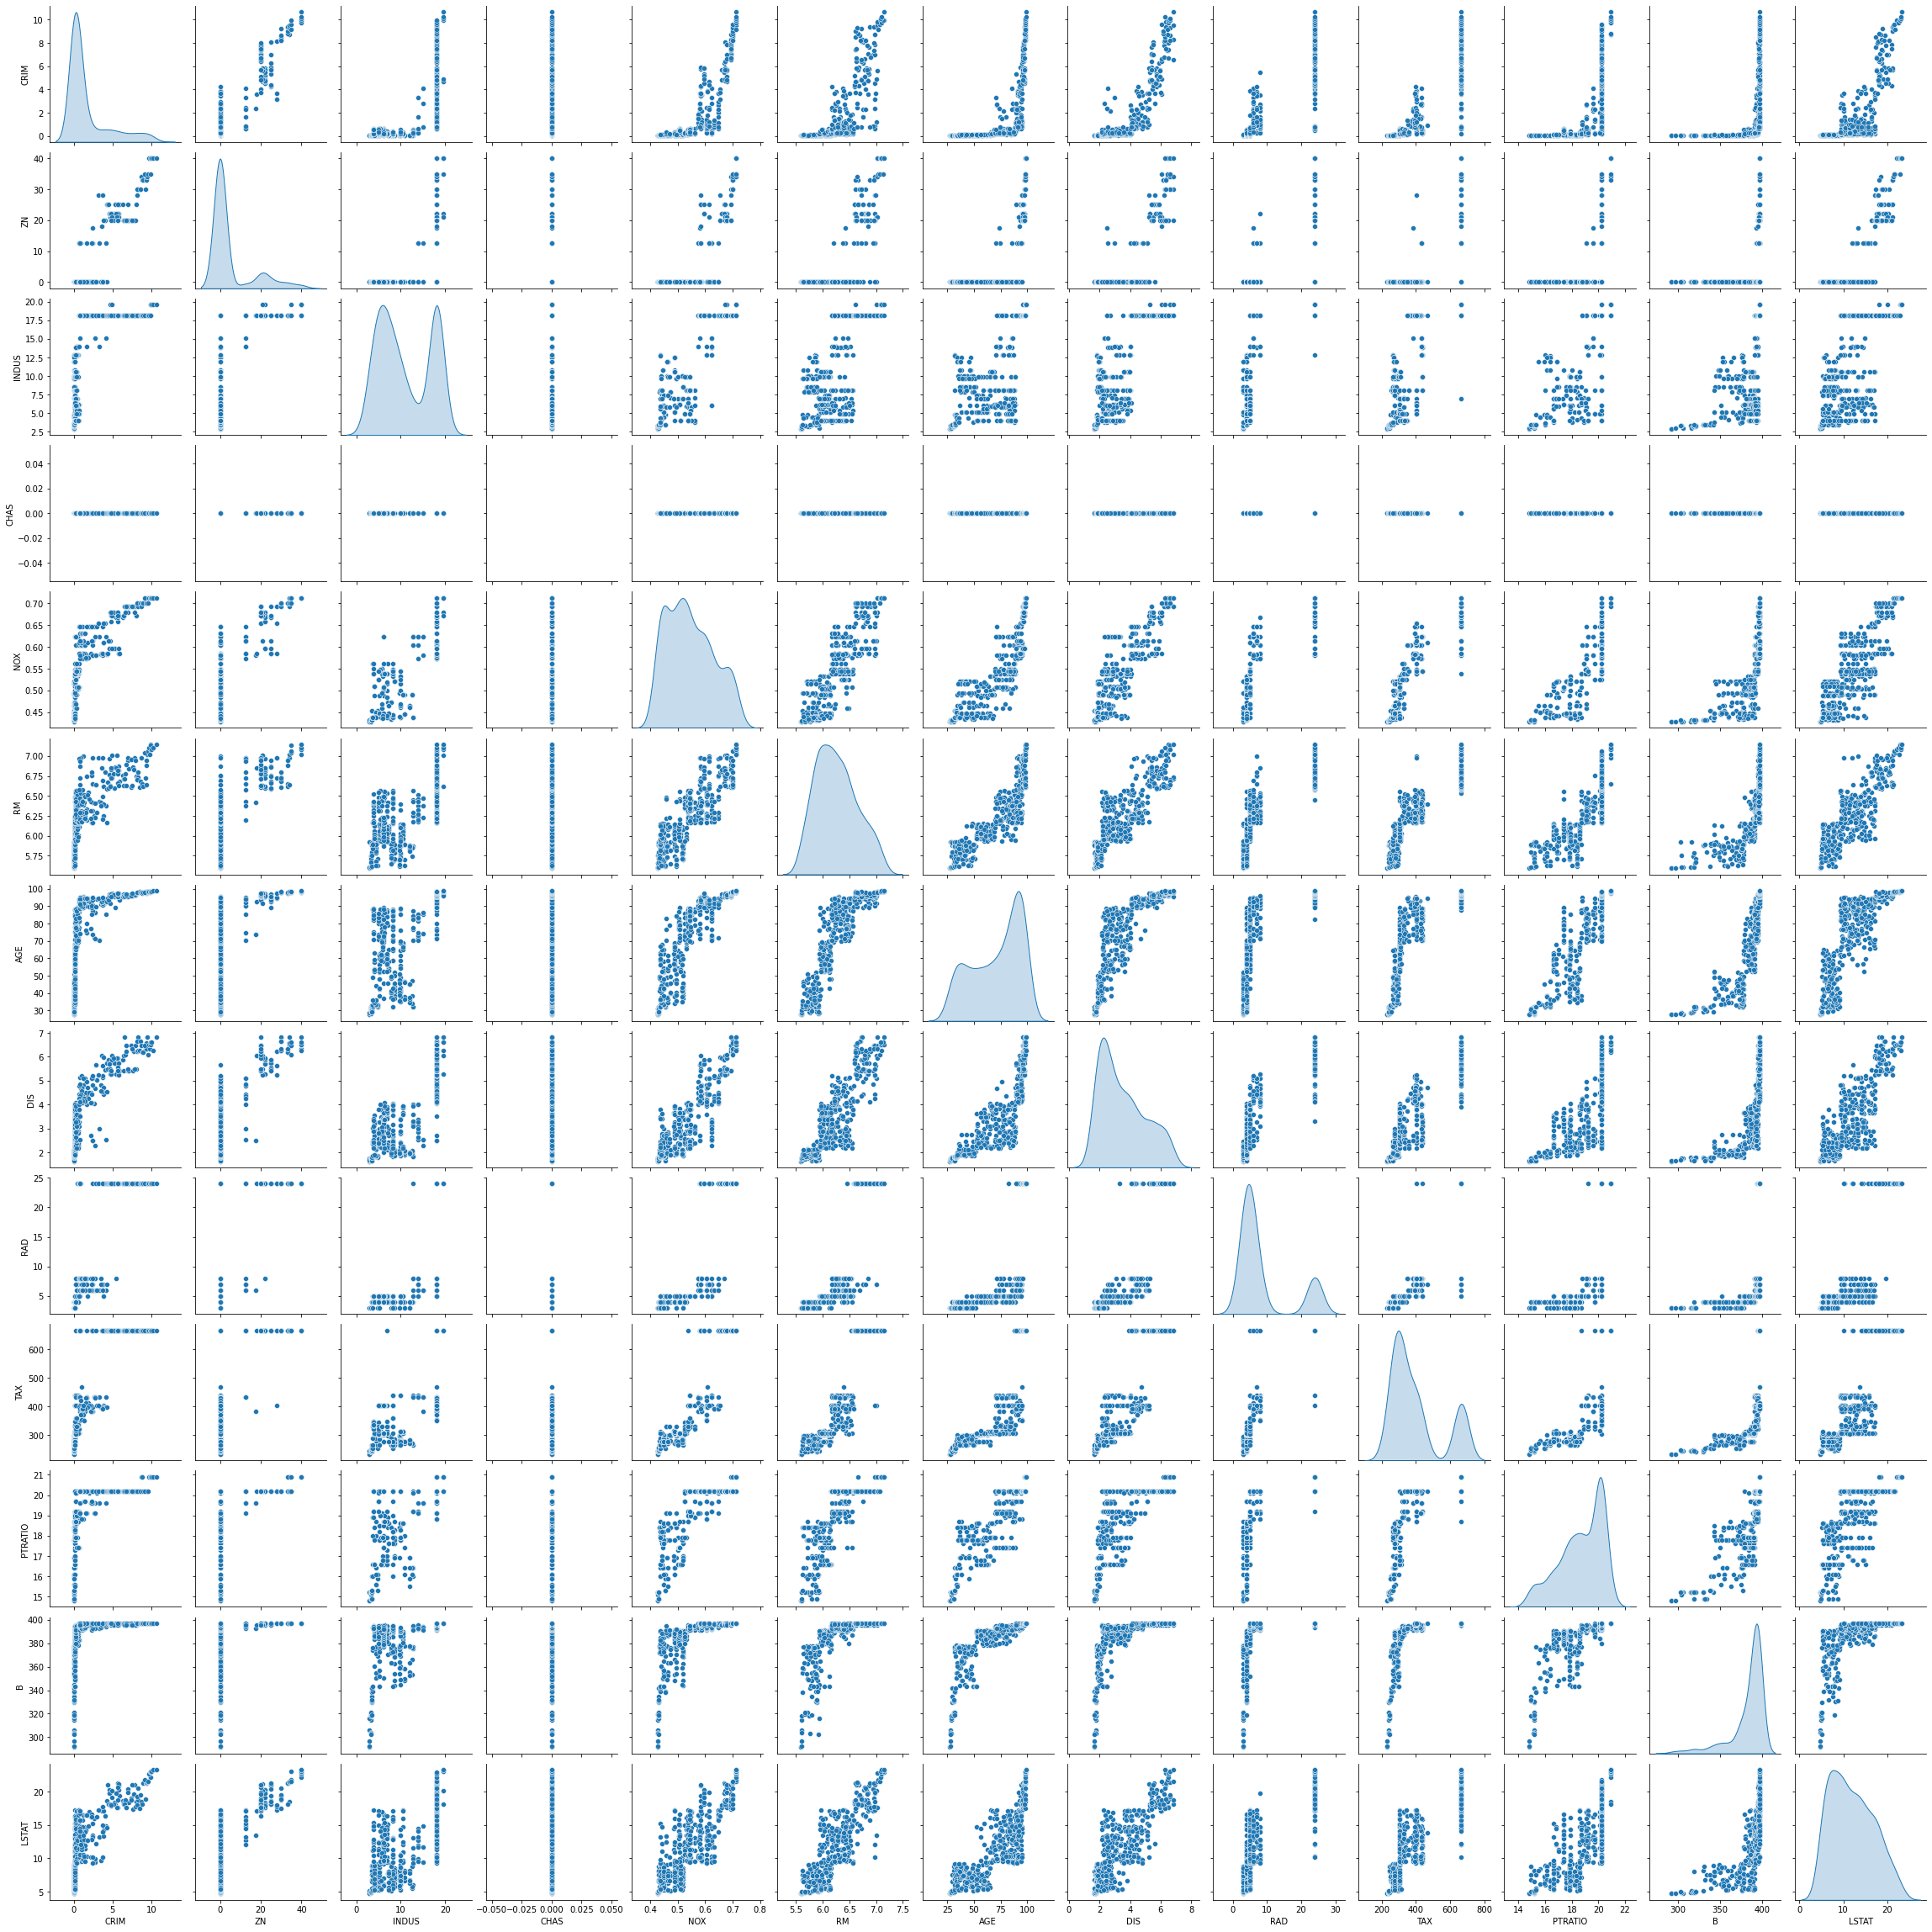

In [106]:
plt.figure(figsize=[24,24],
           dpi=200)
sns.pairplot(data=norm_data,
             kind='scatter',
             diag_kind='kde')
plt.show()

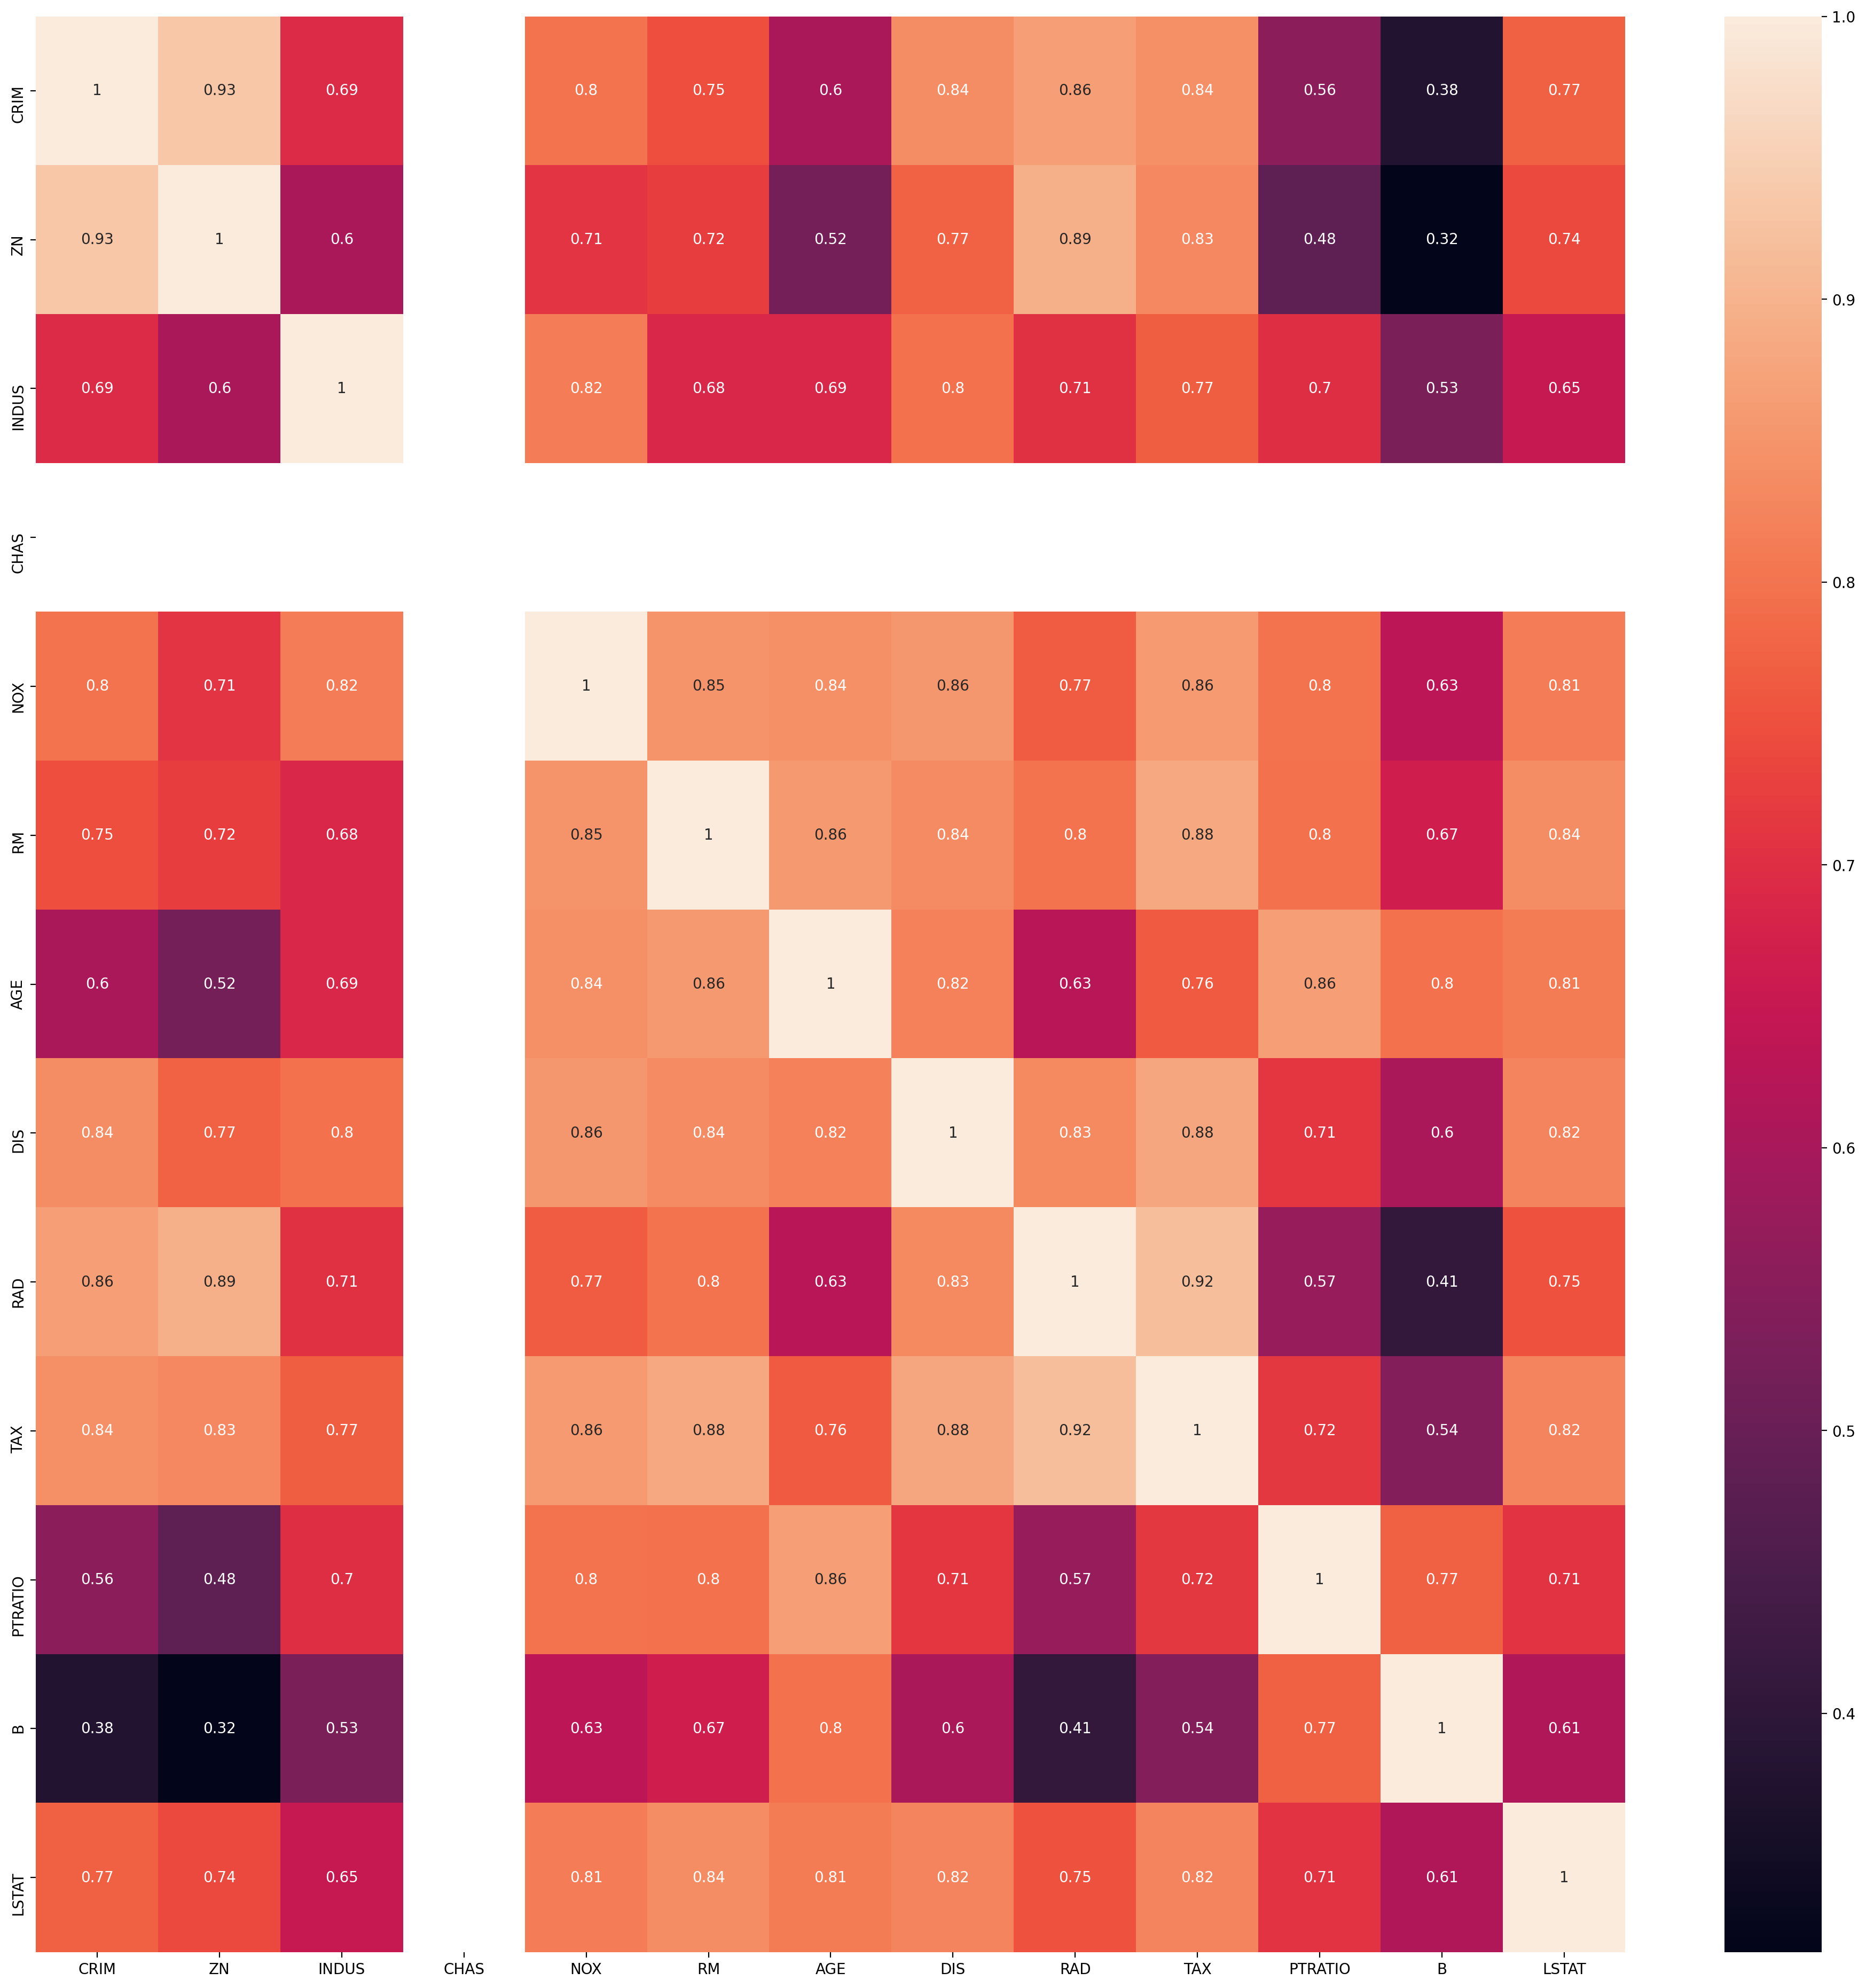

In [107]:
plt.figure(figsize=[24,24],
           dpi=200)
sns.heatmap(data=norm_data.corr(),
            annot=True)
plt.show()

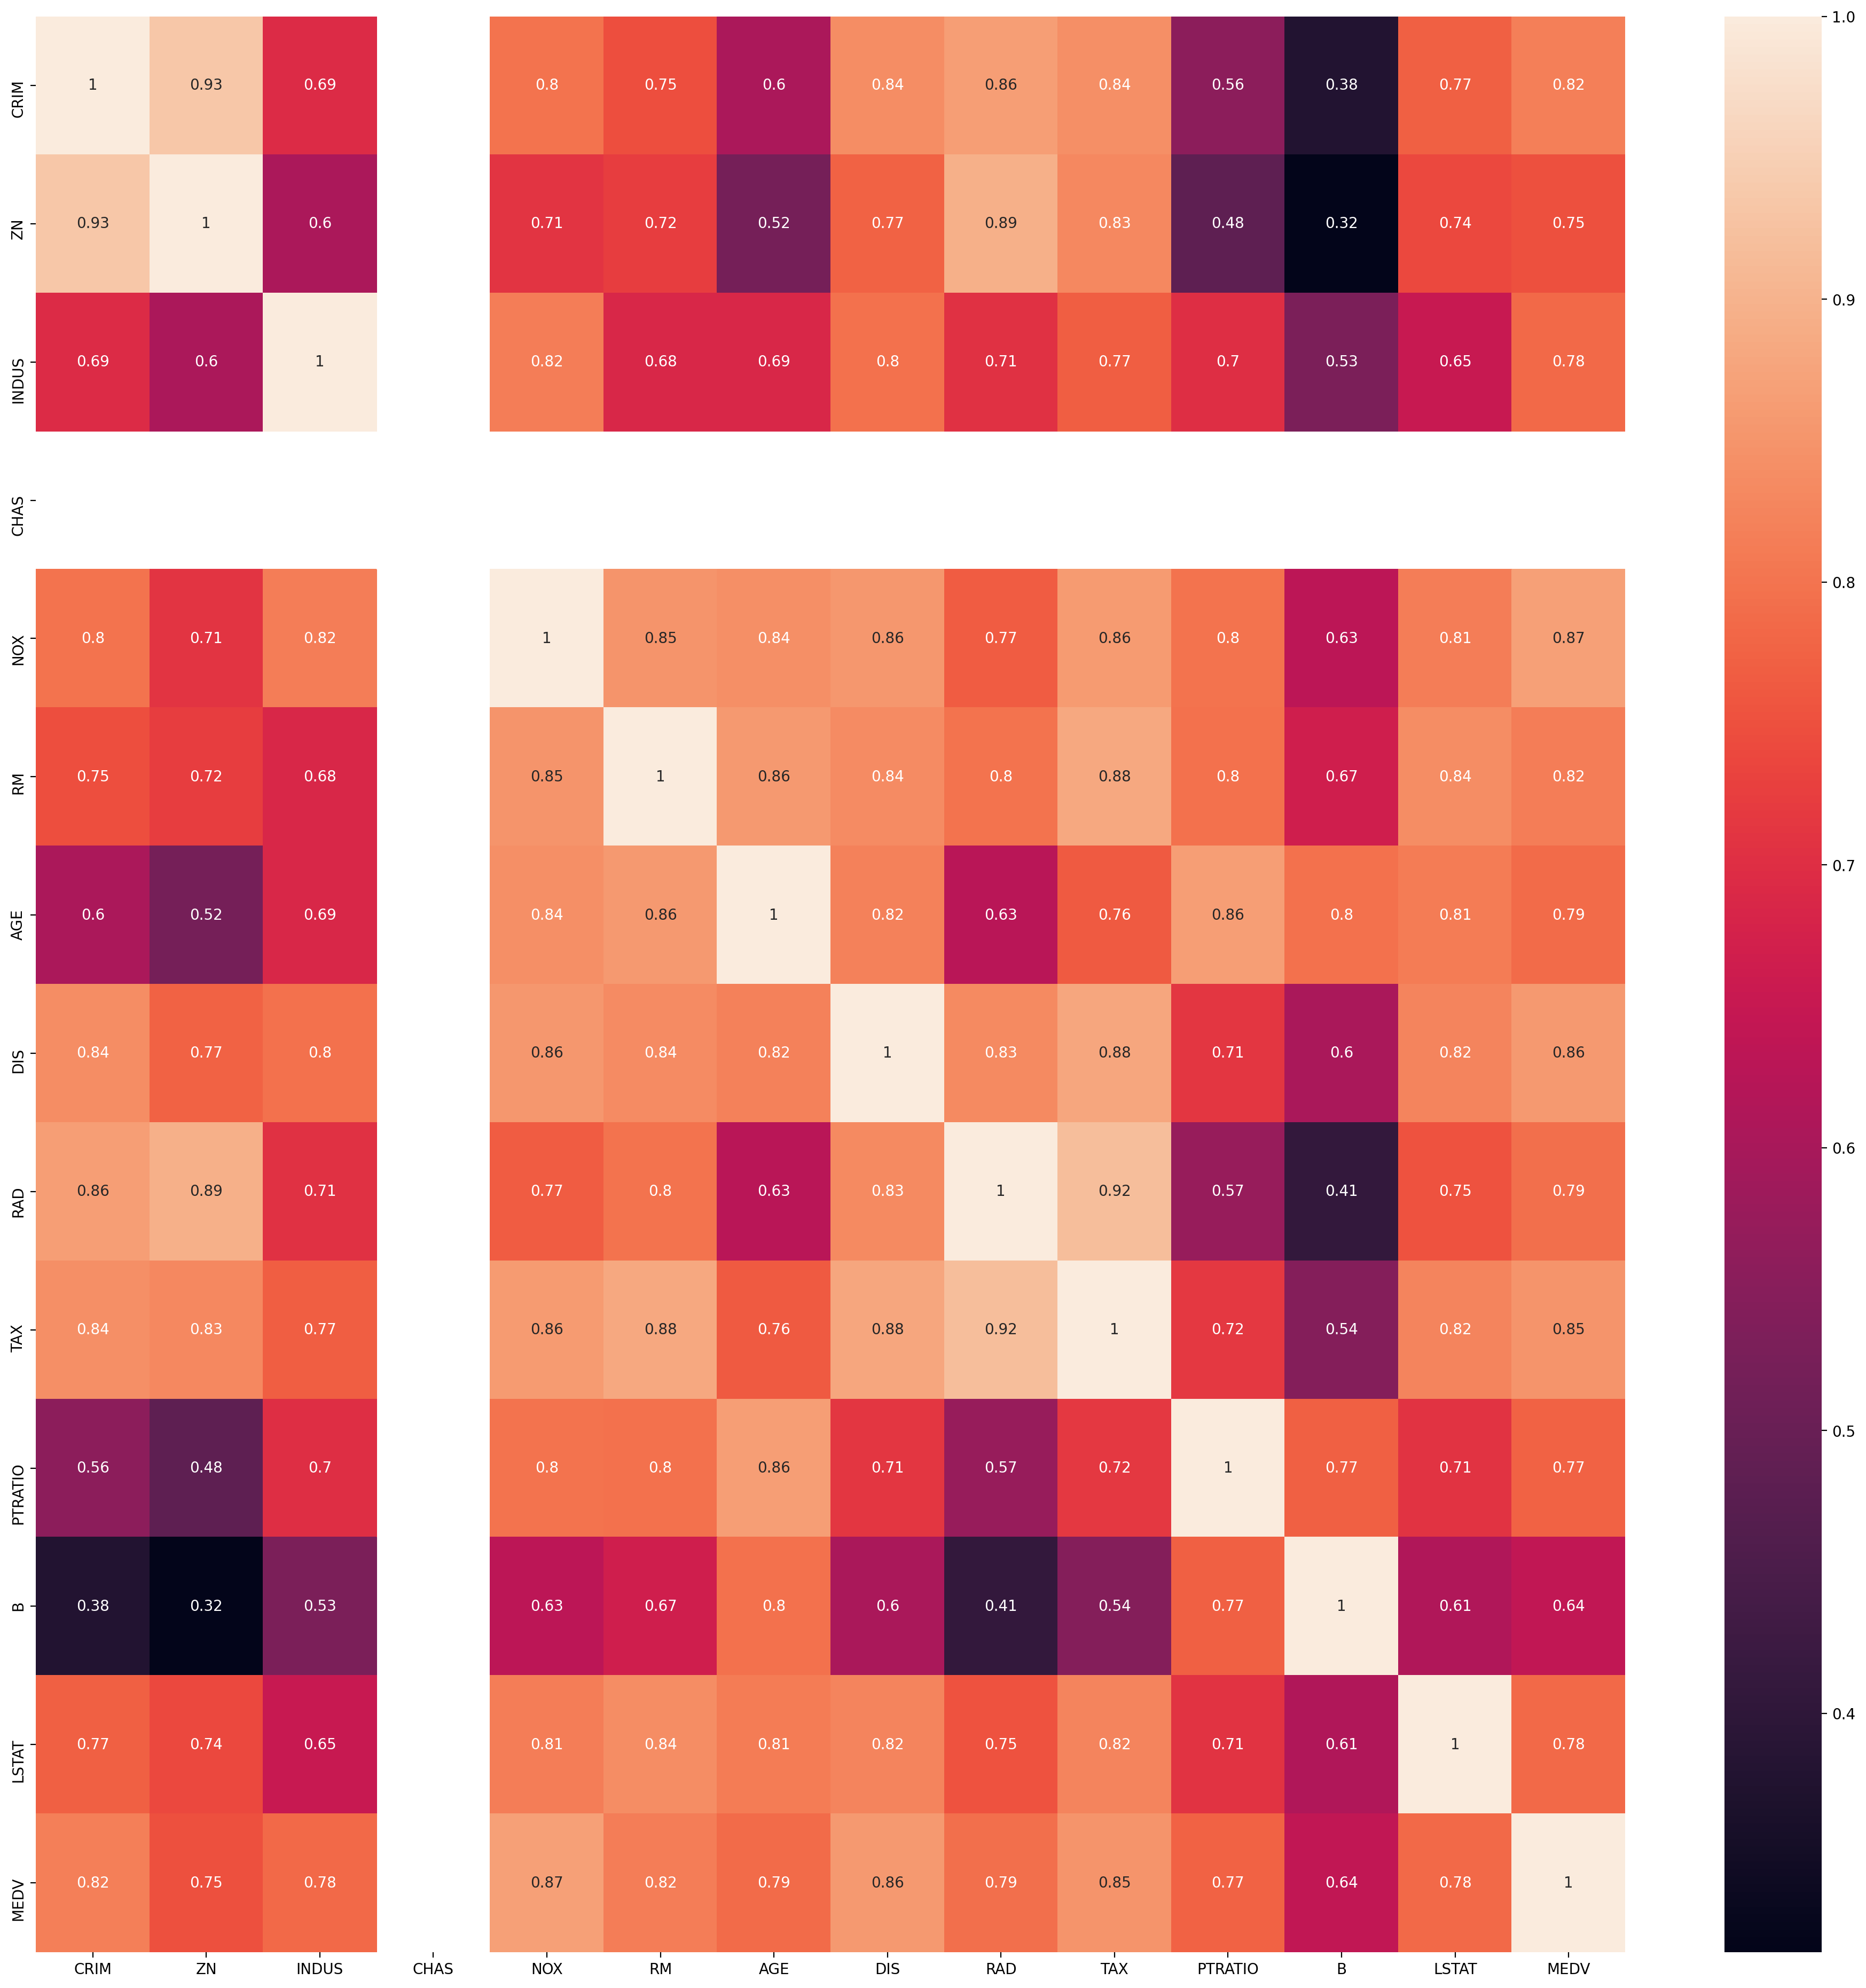

In [108]:
df_full = pd.concat([norm_data,norm_target],
                    axis=1)
plt.figure(figsize=[24,24],
           dpi=200)
sns.heatmap(data=df_full.corr(),
            annot=True)
plt.show()

In [109]:
# find vif values other features
vif = pd.DataFrame()
vif['features'] = cols
vif['vfi_values'] = [variance_inflation_factor(norm_data.values, i) for i in range(norm_data.shape[1])]
vif.sort_values(by='vfi_values',
                ascending=False)

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,features,vfi_values
5,RM,1042.973013
11,B,908.356163
10,PTRATIO,743.235144
4,NOX,357.143296
9,TAX,105.268140
6,AGE,74.337390
7,DIS,61.104032
12,LSTAT,37.269414
8,RAD,24.909898
2,INDUS,19.097291


In [110]:
# drop highest vif and calculate again
copy_data = norm_data.drop(['RM','PTRATIO','NOX','TAX','DIS','AGE','LSTAT','ZN','INDUS'],
                           axis=1,
                           inplace=False)
vif = pd.DataFrame()
vif['features'] = copy_data.columns.values
vif['vfi_values'] = [variance_inflation_factor(copy_data.values, i) for i in range(copy_data.shape[1])]
vif.sort_values(by='vfi_values',
                ascending=False)

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,features,vfi_values
2,RAD,9.045568
0,CRIM,5.420505
3,B,2.853899
1,CHAS,NaN


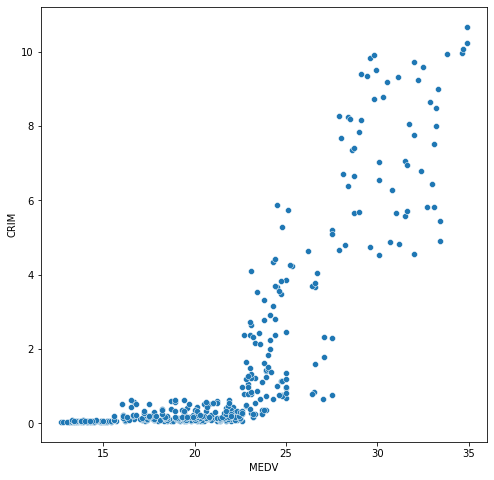

In [111]:
# simple regression
# predict MEDV using CRIM (crime rate)
plt.figure(figsize=[8,8])
sns.scatterplot(x=norm_target['MEDV'],
                y=norm_data['CRIM'])
plt.show()

In [112]:
def prediction(x,coefficient,intercept):
    return x*coefficient+intercept

def cost_function(x,y,coefficient,intercept):
    mean_squre_error = 0.0
    for i in range(len(x)):
        mean_squre_error+=(y[i]-(x[i]*coefficient+intercept))**2

    return mean_squre_error/len(x)

def update_weights(x,y,coefficient,intercept,learning_rate):
    coefficient_derivative = 0
    intercept_derivative = 0

    for i in range(len(x)):
        coefficient_derivative += -2*x[i]*(y[i]-(x[i]*coefficient+intercept))
        intercept_derivative += -2*(y[i]-(x[i]*coefficient+intercept))

    coefficient -= (coefficient_derivative/len(x))*learning_rate
    intercept -= (intercept_derivative/len(x))*learning_rate

    return coefficient,intercept

def train(x,y,coefficient,intercept,learning_rate,epochs):
    cost_history = []

    for i in range(epochs):
        coefficient,intercept = update_weights(x,y,coefficient,intercept,learning_rate)
        cost = cost_function(x,y,coefficient,intercept)
        cost_history.append(cost)

    return coefficient,intercept,cost_history

In [113]:
train_x,test_x,train_y,test_y = train_test_split(norm_data['CRIM'].values,
                                                 norm_target['MEDV'].values,
                                                 test_size=0.2,
                                                 random_state=0)
test_x.shape,train_x.shape,train_y.shape,test_y.shape

((82,), (327,), (327,), (82,))

In [114]:
coff,inter,cost_hist = train(x=train_x,
                             y=train_y,
                             coefficient=0.3,
                             intercept=2,
                             learning_rate=0.01,
                             epochs=10001)

In [115]:
coff,inter

(1.584981281428406, 19.01681003342859)

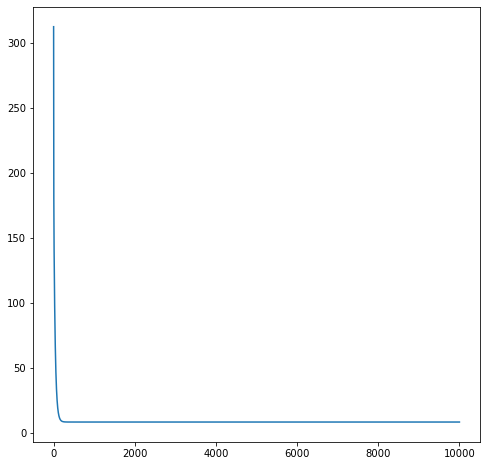

In [116]:
plt.figure(figsize=[8,8])
plt.plot(cost_hist)
plt.show()

In [117]:
predictions = prediction(test_x,
                         coff,
                         inter)
predictions

array([19.53956856, 21.33620824, 21.4244283 , 26.2377787 , 19.18575319,
       33.80324306, 19.35162148, 23.6512953 , 19.10495084, 19.37325647,
       26.78039705, 19.25611051, 19.11929492, 20.32483169, 19.10279527,
       19.16903164, 19.29332587, 19.30462678, 21.57309954, 21.0352203 ,
       19.24033994, 19.14162731, 19.24625192, 20.3490502 , 19.24591908,
       28.06416848, 19.12796477, 20.80241825, 19.10176503, 19.86794498,
       19.11447658, 19.28470357, 22.57090866, 19.30744805, 19.10651997,
       19.23918291, 30.05168746, 19.10560068, 19.29150314, 29.56473366,
       33.64983272, 26.54922753, 20.97025191, 34.73435616, 19.08486913,
       19.0791315 , 28.32389937, 19.47788109, 19.14780874, 19.41620947,
       19.24236872, 25.90956078, 19.31535711, 29.66427049, 20.01496785,
       19.39883807, 19.3200645 , 20.22396348, 19.67042461, 20.05758799,
       19.2316384 , 19.12810742, 19.08621636, 19.091954  , 19.14711134,
       19.17543496, 19.08200031, 19.2824529 , 33.57806477, 19.22

In [118]:
score = r2_score(test_y,predictions)
score

0.5819907028456357

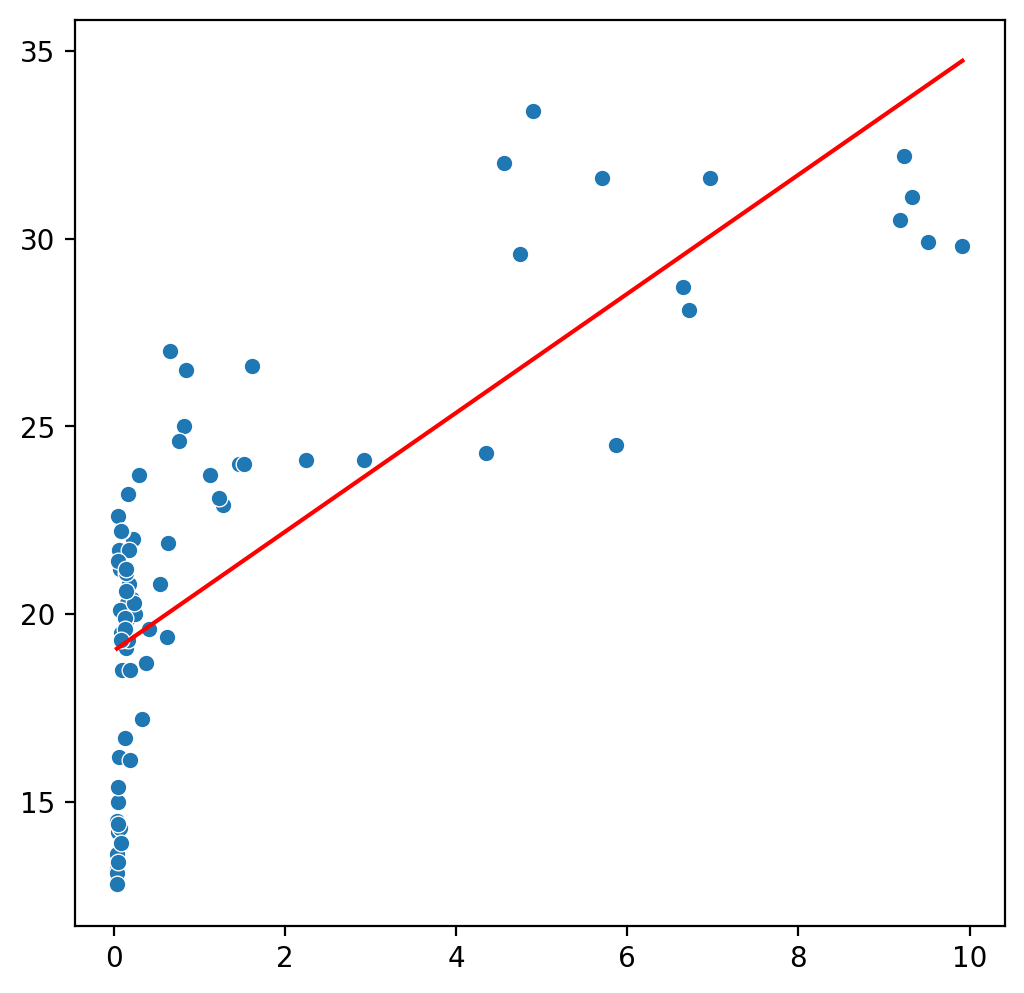

In [119]:
plt.figure(figsize=[6,6],
           dpi=200)
sns.scatterplot(x=test_x,
                y=test_y)
sns.lineplot(x=test_x,
             y=predictions,
             color='red')
plt.show()

In [120]:
multivarient_model = LinearRegression()

In [121]:
train_x,test_x,train_y,test_y = train_test_split(norm_data[['CRIM','RAD','B']].values,
                                                 norm_target['MEDV'].values,
                                                 test_size=0.2,
                                                 random_state=0)
test_x.shape,train_x.shape,train_y.shape,test_y.shape

((82, 3), (327, 3), (327,), (82,))

In [122]:
model = multivarient_model.fit(train_x,
                               train_y)

In [123]:
model.coef_,model.intercept_

(array([1.06368873, 0.10629046, 0.09863426]), -18.93174063029753)

In [124]:
predicts = model.predict(test_x)
predicts

array([20.72366681, 22.62308213, 22.46970612, 27.61319761, 19.8847851 ,
       32.69041795, 20.75239039, 23.88920548, 18.79292579, 20.77184146,
       27.97735144, 19.21295846, 15.49731798, 23.51873792, 13.00582777,
       19.98896528, 19.8916445 , 20.44073071, 22.67577059, 22.25143671,
       20.26541758, 18.71989163, 19.90664559, 23.66124294, 19.52963933,
       28.83889677, 18.66535087, 21.8744959 , 12.99010669, 19.48918644,
       16.46464552, 20.64928724, 23.11089019, 20.49884561, 18.62728694,
       20.18770637, 30.17273053, 17.4864579 , 20.57198403, 29.71376353,
       32.58746351, 27.82221244, 21.94100633, 33.31529253, 11.36041403,
       10.25876412, 29.01320344, 20.74539397, 17.79612613, 19.68116852,
       20.18514721, 27.29725371, 20.17199049, 29.78352221, 20.94506169,
       20.44477581, 20.36330655, 23.57729663, 19.52134877, 23.3403757 ,
       19.62066244, 15.79936942, 12.84181848, 18.28412782, 15.94527931,
       20.24257273, 11.43640983, 20.6083231 , 32.53929969, 15.49

In [125]:
mv_score = r2_score(test_y,predicts)
mse = mean_squared_error(test_y,predicts)
mv_score,mse

(0.8126680579339087, 5.176381631666836)

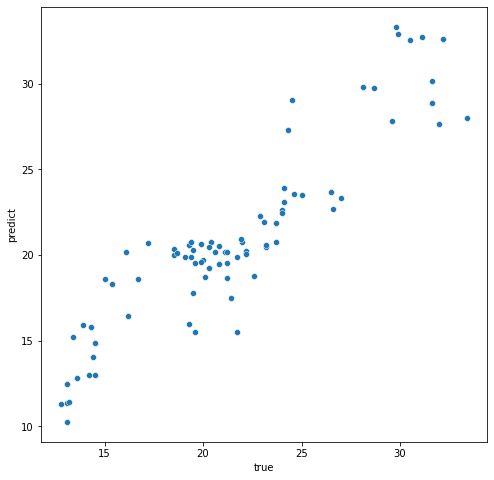

In [126]:
plt.figure(figsize=[8,8])
sns.scatterplot(x=test_y,
                y=predicts)
plt.xlabel('true')
plt.ylabel('predict')
plt.show()

In [129]:
# batch gradiant decent
def mv_cost_function(x,y,theta):
    cost = np.sum((x.dot(theta)-y)**2)/2/len(y)
    return cost

def BGD(x,y,theta,learning_rate,epochs):
    cost_history = np.ones(epochs)

    for i in range(epochs):
        hypothesis = np.dot(x,theta)
        loss = hypothesis - y
        gradient = np.dot(x.T,loss)/len(y)
        theta = theta - learning_rate*gradient
        cost_history[i] = mv_cost_function(x,y,theta)

    return theta,cost_history

def train(x,y,learning_rate,epochs):
    n = x.shape[1]
    one_column = np.ones((x.shape[0],1))
    x = np.concatenate([one_column,x],axis=1)
    theta = np.array([0,0,0,0])
    y = y.flatten()
    theta,cost = BGD(theta=theta,
                     learning_rate=learning_rate,
                     epochs=epochs,
                     x=x,
                     y=y,)
    return theta,cost

In [136]:
t,c = train(np.log(train_x),np.log(train_y),0.0001,10001)

In [137]:
t

array([0.07560563, 0.04711267, 0.16903511, 0.45294202])

In [138]:
c

array([4.63982645, 4.60244919, 4.56537468, ..., 0.00666267, 0.00666264,
       0.0066626 ])

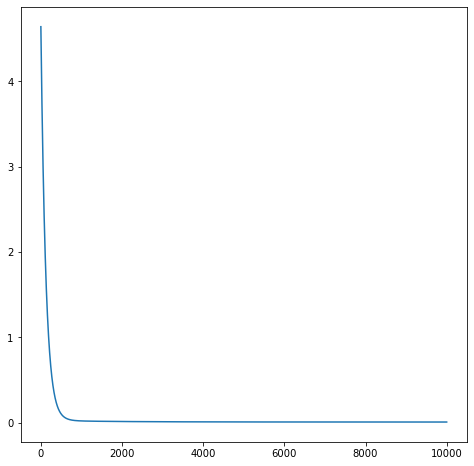

In [139]:
plt.figure(figsize=[8,8])
plt.plot(c)
plt.show()